# Football Summer Market 2022

## About Dataset

This dataset includes all the operations in the summer window, whether transfers, transfers on loan 

or other types of operations. It is an optimal dataset to perform EDA or analysis of transfer market 

data by club, country or league.

The summer window of transfers is from 01/07/2022 to 01/09/2022.

The dataset is composed of the following fields:

name of player

position

age

origin_club

leagueoriginclub

countryoriginclub

new_club

leaguenewclub

countrynewclub

player_value

cost


## Getting Insights about the data:

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats
import copy
import math
from warnings import filterwarnings
filterwarnings("ignore")
sns.set()
%matplotlib inline

In [2]:
#Read CSV file
df = pd.read_csv('Summer22_FootballTransfers.csv') #,delimiter=";"
print(df.columns)

Index(['name', 'position', 'age', 'origin_club', 'league_origin_club',
       'country_origin_club', 'new_club', 'league_new_club',
       'country_new_club', 'cost', 'date_of_transfer'],
      dtype='object')


In [3]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


Get info. about the dataset befor cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33620 non-null  object 
 1   position             33615 non-null  object 
 2   age                  33477 non-null  float64
 3   origin_club          33620 non-null  object 
 4   league_origin_club   32685 non-null  object 
 5   country_origin_club  32690 non-null  object 
 6   new_club             33615 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  object 
 10  date_of_transfer     33625 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [5]:
#not_cleaned_data = df.size
#not_cleaned_data_shape = df.shape

In [6]:
print(f'Dataset shape : {np.shape(df)}')

Dataset shape : (33625, 11)


## Data Cleaning

In [7]:
print(df['age'].mean())

25.02043193834573


In [8]:
x = int(df['age'].mean())
df["age"].fillna(x,inplace=True)

In [9]:
print(df["position"].mode()[0])
print(df['country_new_club'].mode()[0])
print(df['country_origin_club'].mode()[0])
print(df['league_new_club'].mode()[0])
print(df['new_club'].mode()[0])
print(df['league_origin_club'].mode()[0])
print(df['origin_club'].mode()[0])

Centre-Back
Italy
Italy
Italy
Without Club
Italy
Without Club


### Hint: Replace the null value with the most frequently value

In [10]:
c= df["position"].mode()[0]
df["position"].fillna(c,inplace=True)
#========================
c= df["country_new_club"].mode()[0]
df["country_new_club"].fillna(c,inplace=True)
#========================
c= df["country_origin_club"].mode()[0]
df["country_origin_club"].fillna(c,inplace=True)
#========================
c= df["league_new_club"].mode()[0]
df["league_new_club"].fillna(c,inplace=True)
#========================
c= df["new_club"].mode()[0]
df["new_club"].fillna(c,inplace=True)
#========================
c= df["league_origin_club"].mode()[0]
df["league_origin_club"].fillna(c,inplace=True)
#========================
c= df["origin_club"].mode()[0]
df["origin_club"].fillna(c,inplace=True)

### Hint: Replace null value with Anonymous name

In [11]:
df['name'].fillna('Anonymous',inplace=True)

In [12]:
df['cost']

0        €42.00m
1        €18.00m
2        €50.00m
3        €30.00m
4        €10.00m
          ...   
33620     €10Th.
33621     €10Th.
33622     €10Th.
33623     €10Th.
33624     €25Th.
Name: cost, Length: 33625, dtype: object

In [13]:
# Conversion of player cost  column from str to numerical value.
df.cost = df["cost"].astype(str).str.replace("€","")
def value_to_float(x):
    x=x.upper()
    
    if type(x) == float or type(x) == int:
        return x
    if 'TH' in x:
       
        if len(x) > 1:
            return float(x.replace('TH', '')) * 1000
        return 1000.0
    if 'M' in x:
       
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0

In [14]:
df['cost'] = df['cost'].apply(value_to_float)
print(df['cost'])

0        42000000.0
1        18000000.0
2        50000000.0
3        30000000.0
4        10000000.0
            ...    
33620       10000.0
33621       10000.0
33622       10000.0
33623       10000.0
33624       25000.0
Name: cost, Length: 33625, dtype: float64


In [15]:
cost_set=(df['cost'].unique())
print(f'max cost: {cost_set.max()}')
df['cost'].describe()

max cost: 150000000.0


count    3.362500e+04
mean     4.782539e+05
std      2.429132e+06
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+05
75%      2.500000e+05
max      1.500000e+08
Name: cost, dtype: float64

In [16]:
#frequency of age category
print(type(df['age']))
print(df['age'].value_counts())

<class 'pandas.core.series.Series'>
21.0    2984
22.0    2957
20.0    2817
23.0    2674
24.0    2437
25.0    2415
19.0    2314
26.0    2067
27.0    1893
28.0    1749
29.0    1592
30.0    1456
31.0    1145
32.0    1062
18.0    1017
33.0     855
34.0     614
35.0     538
36.0     326
17.0     210
37.0     204
38.0     133
39.0      58
16.0      38
40.0      35
41.0      14
42.0      10
15.0       4
43.0       3
45.0       2
44.0       1
46.0       1
Name: age, dtype: int64


Quick description of the data after cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33625 non-null  object 
 1   position             33625 non-null  object 
 2   age                  33625 non-null  float64
 3   origin_club          33625 non-null  object 
 4   league_origin_club   33625 non-null  object 
 5   country_origin_club  33625 non-null  object 
 6   new_club             33625 non-null  object 
 7   league_new_club      33625 non-null  object 
 8   country_new_club     33625 non-null  object 
 9   cost                 33625 non-null  float64
 10  date_of_transfer     33625 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.8+ MB


In [18]:
position_col=(df['position'].unique())
print("-------------------------")
print(f'Num.of position: {len(position_col)}')
print("-------------------------")
origin_club_col=(df['origin_club'].unique())
print("-------------------------")
print(f'Num.of origin club: {len(origin_club_col)}')
print("-------------------------")
league_origin_club_col=(df['league_origin_club'].unique())
print("-------------------------")
print(f'Num.of league_origin_club: {len(league_origin_club_col)}')
print("-------------------------")
country_origin_club_col=(df['country_origin_club'].unique())
print("-------------------------")
print(f'Num.of country origin club: {len(country_origin_club_col)}')
print("-------------------------")
new_club_col=(df['new_club'].unique())
print("-------------------------")
print(f'num.of new club: {len(new_club_col)}')
print("-------------------------")
league_new_club_col=(df['league_new_club'].unique())
print("-------------------------")
print(f'Num.of league new club: {len(league_new_club_col)}')
print("-------------------------")
country_new_club_col=(df['country_new_club'].unique())
print("-------------------------")
print(f'Num.of country new club: {len(country_new_club_col)}')

-------------------------
Num.of position: 16
-------------------------
-------------------------
Num.of origin club: 5819
-------------------------
-------------------------
Num.of league_origin_club: 462
-------------------------
-------------------------
Num.of country origin club: 153
-------------------------
-------------------------
num.of new club: 6317
-------------------------
-------------------------
Num.of league new club: 463
-------------------------
-------------------------
Num.of country new club: 139


## Exploring the data:

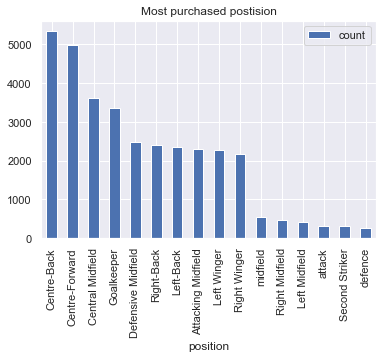

In [20]:
#show the Most purchased postision
postision_count = df.groupby(['position'])['position'].count().to_frame()
postision_count=postision_count.rename(columns={"position": "count"}).sort_values(by=["count"],ascending=False)
postision_count.plot.bar(y='count',color='b',title='Most purchased postision')
plt.show()

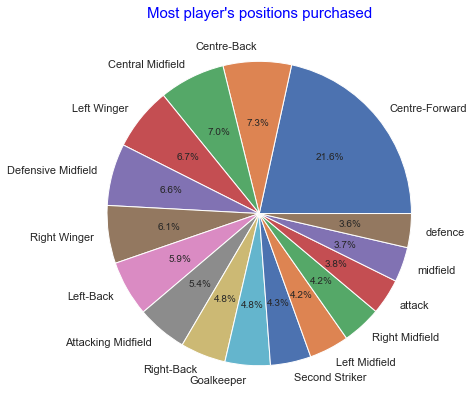

In [21]:
#get the most position that purchased
labels = df.groupby("position").cost.sum().sort_values(ascending=False).head(16).index
sizes = df.groupby("new_club").cost.sum().sort_values(ascending=False).head(16).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Most player\'s positions purchased' ,color = 'blue',fontsize = 15)
plt.show()

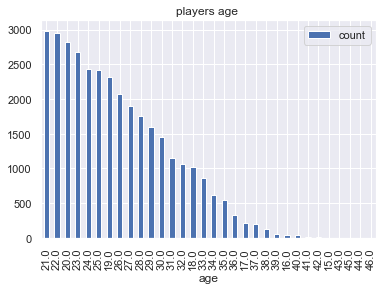

In [22]:
#get the numbers of players according to the age
age_count = df.groupby(['age'])['age'].count().to_frame()
age_count=age_count.rename(columns={"age": "count"}).sort_values(by=["count"],ascending=False)
age_count.plot.bar(y='count',color='b',title='players age ')
plt.show()

shows a summary of the age attributes

In [23]:
df['age'].describe()

count    33625.000000
mean        25.020342
std          4.773947
min         15.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         46.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

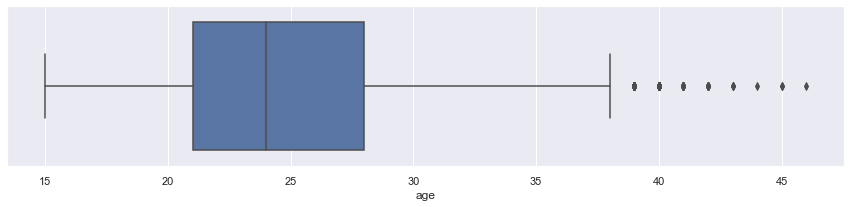

In [24]:
#age outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.age, color='b')

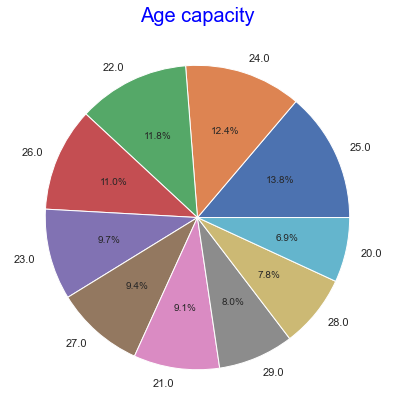

In [25]:
#age pie chart
labels = df.groupby("age").cost.sum().sort_values(ascending=False).head(10).index
sizes = df.groupby("age").cost.sum().sort_values(ascending=False).head(10).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Age capacity',color = 'blue',fontsize = 20)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cost'}>]], dtype=object)

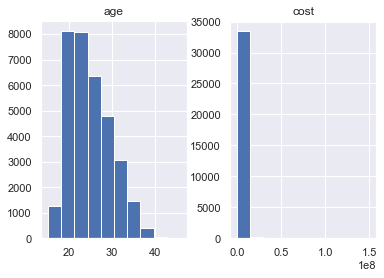

In [26]:
#Histogram 
df.hist()

<AxesSubplot:>

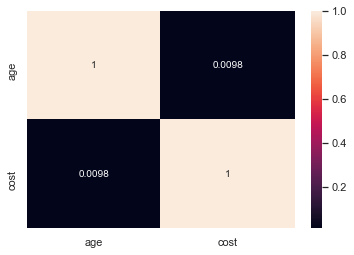

In [27]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

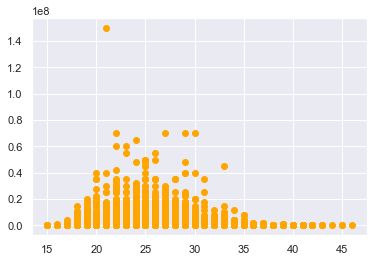

In [28]:
x = np.array(df['age'])
y = np.array(df['cost'])
plt.scatter(x, y,color = 'orange')
plt.show()

Text(0.5, 1.0, 'Money spent per country')

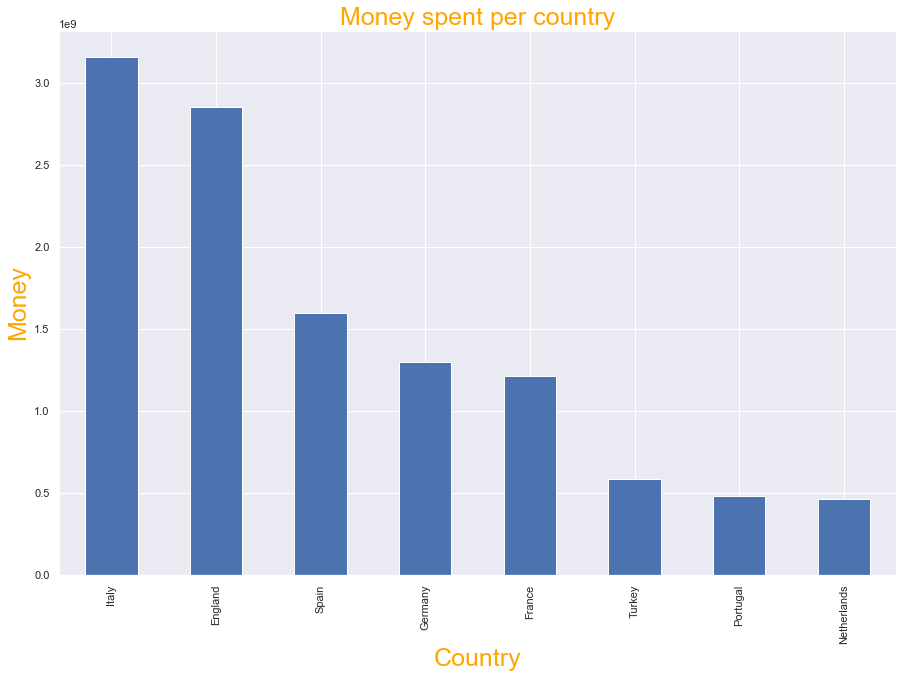

In [29]:
# Select how many countries you want to display
top_n = 8
sum_per_country = df.groupby('country_new_club')['cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sum_per_country.nlargest(top_n,).plot(kind='bar')
plt.xlabel('Country',fontsize=25,c='orange')
plt.ylabel('Money',fontsize=25,c='orange')
plt.title('Money spent per country',fontsize=25,c='orange')

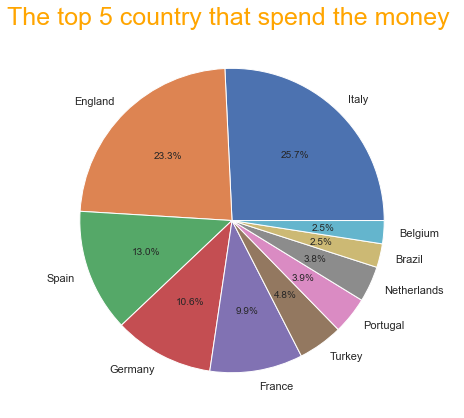

In [30]:
labels = df.groupby("country_new_club").cost.sum().sort_values(ascending=False).head(10).index
sizes = df.groupby("country_new_club").cost.sum().sort_values(ascending=False).head(10).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('The top 5 country that spend the money ',color = 'orange',fontsize = 25)
plt.show()

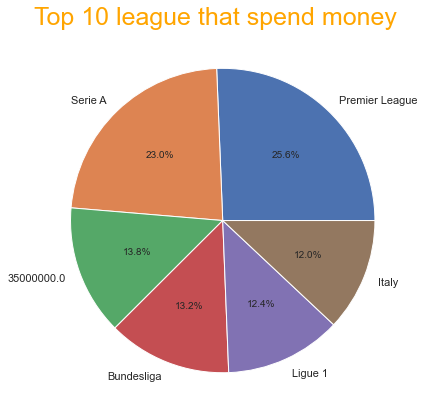

In [73]:
labels = df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6).index
sizes = df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 league that spend money  ',color = 'orange',fontsize = 25)
plt.show()

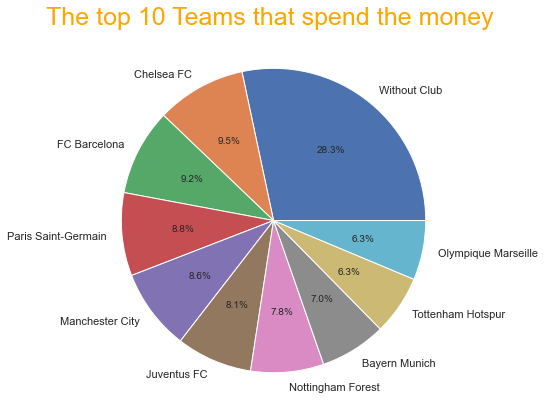

In [32]:
labels = df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10).index
sizes = df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('The top 10 Teams that spend the money ',color = 'orange',fontsize = 25)
plt.show()

In [33]:
labels = df.groupby("league_origin_club").cost.sum().sort_values(ascending=False).head(10)
print(labels)
print("--------------------")
labels2=labels.values
for i in labels2:
    print(float(i))


league_origin_club
Premier League    2.008950e+09
Serie A           1.648650e+09
Bundesliga        1.290395e+09
Ligue 1           1.106350e+09
LaLiga            1.039900e+09
Liga Portugal     6.091750e+08
Premier Liga      4.439000e+08
Eredivisie        4.338000e+08
Championship      4.334000e+08
Serie B           2.806150e+08
Name: cost, dtype: float64
--------------------
2008950000.0
1648650000.0
1290395000.0
1106350000.0
1039900000.0
609175000.0
443900000.0
433800000.0
433400000.0
280615000.0


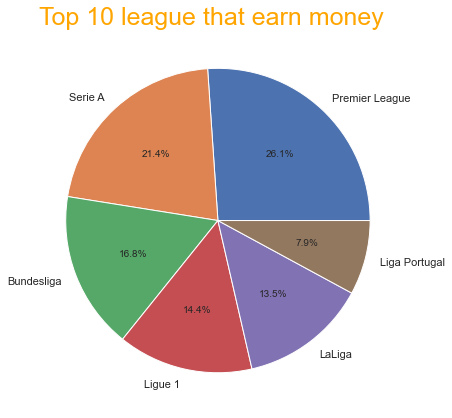

In [34]:
labels = df.groupby("league_origin_club").cost.sum().sort_values(ascending=False).head(6).index
sizes = df.groupby("league_origin_club").cost.sum().sort_values(ascending=False).head(6).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 league that earn money  ',color = 'orange',fontsize = 25)
plt.show()

In [35]:
#get the top 10 earned club
labels = df.groupby("origin_club").cost.sum().sort_values(ascending=False).head(10)
print(labels)

origin_club
Chelsea FC             294300000.0
Juventus FC            242100000.0
Manchester City        214950000.0
Ajax Amsterdam         208100000.0
Borussia Dortmund      197500000.0
Paris Saint-Germain    182150000.0
SSC Napoli             173325000.0
Without Club           166680000.0
SL Benfica             166500000.0
Sevilla FC             165100000.0
Name: cost, dtype: float64


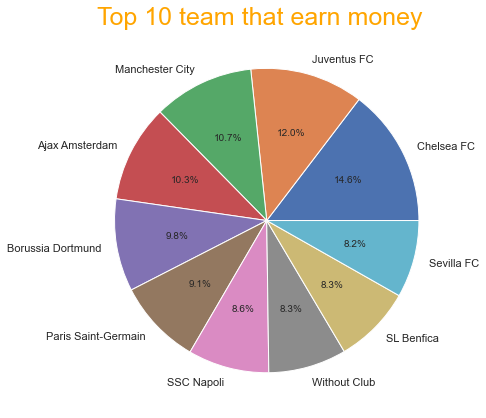

In [36]:
labels = df.groupby("origin_club").cost.sum().sort_values(ascending=False).head(10).index
sizes = df.groupby("origin_club").cost.sum().sort_values(ascending=False).head(10).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 team that earn money  ',color = 'orange',fontsize = 25)
plt.show()

<AxesSubplot:xlabel='age', ylabel='position'>

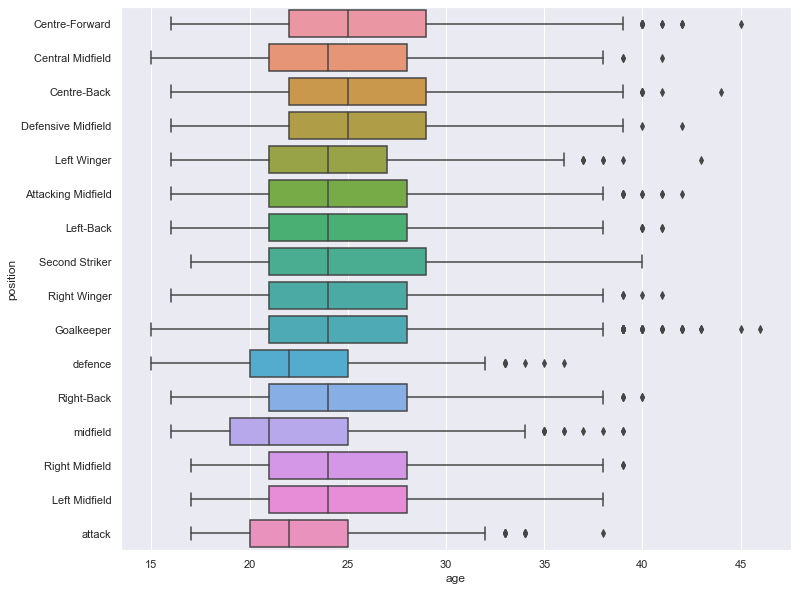

In [37]:
rcParams['figure.figsize'] = 12,10
sns.boxplot(data=df,x='age',y='position')

number of players in every position

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Centre-Forward'),
  Text(1, 0, 'Central Midfield'),
  Text(2, 0, 'Centre-Back'),
  Text(3, 0, 'Defensive Midfield'),
  Text(4, 0, 'Left Winger'),
  Text(5, 0, 'Attacking Midfield'),
  Text(6, 0, 'Left-Back'),
  Text(7, 0, 'Second Striker'),
  Text(8, 0, 'Right Winger'),
  Text(9, 0, 'Goalkeeper'),
  Text(10, 0, 'defence'),
  Text(11, 0, 'Right-Back'),
  Text(12, 0, 'midfield'),
  Text(13, 0, 'Right Midfield'),
  Text(14, 0, 'Left Midfield'),
  Text(15, 0, 'attack')])

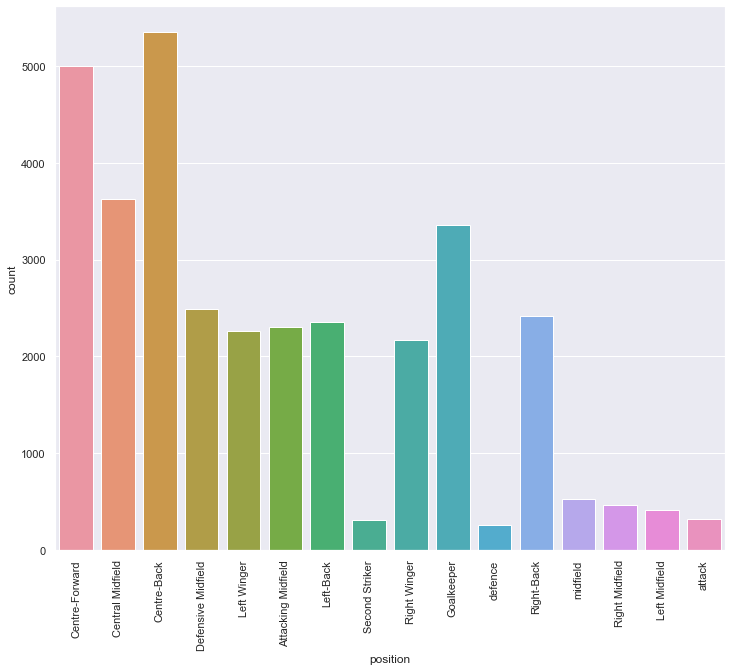

In [38]:
sns.countplot(x='position',data=df)
plt.xticks(rotation=90)

In [39]:
# Select number of countries
number_of_countries_displayed = 20

tranfers_per_country = df.groupby('country_new_club')['name'].count().sort_values(ascending=False).nlargest(number_of_countries_displayed)
mean_transfers_country = df.groupby('country_new_club')['name'].count().mean()

print(tranfers_per_country)
print('==========================')
print(f'Mean of transfers: { math.ceil(mean_transfers_country)}')

country_new_club
Italy                 9577
Spain                 2112
Germany               1464
Turkey                1090
Russia                 988
England                878
France                 825
Romania                755
Serbia                 661
Portugal               553
Greece                 506
Netherlands            500
Iran                   486
Croatia                478
Bosnia-Herzegovina     412
Switzerland            393
Belgium                385
Czech Republic         383
Bulgaria               382
Austria                381
Name: name, dtype: int64
Mean of transfers: 242


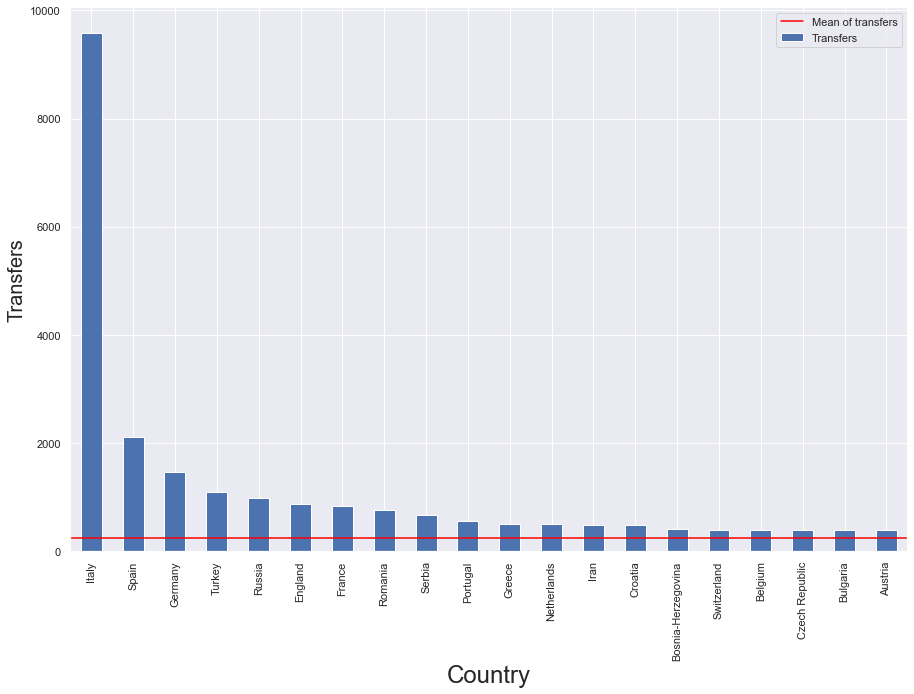

In [40]:
#number os transfers for every country
data = df.loc[df['country_new_club']!='No club'].groupby('country_new_club')['name'].count().sort_values(ascending=False).nlargest(number_of_countries_displayed)
plt.figure(figsize=(15,10))
data.plot(kind='bar')
plt.xlabel('Country',fontsize=24)
plt.ylabel('Transfers',fontsize=20)
plt.axhline(mean_transfers_country,linestyle='-',c='red')
plt.legend(['Mean of transfers','Transfers'])

In [41]:
cost_per_country = df.groupby('country_new_club')['cost'].agg(['max','mean','sum','count'])
cost_per_country[cost_per_country['mean']> 0].sort_values(by='mean',ascending=False)

,max,mean,sum,count
country_new_club,,,,
Monaco,27000000.0,9.271429e+06,6.490000e+07,7
England,150000000.0,3.251743e+06,2.855030e+09,878
Canada,25000000.0,1.754500e+06,5.263500e+07,30
France,55000000.0,1.466206e+06,1.209620e+09,825
Brazil,17000000.0,1.065259e+06,3.089250e+08,290
...,...,...,...,...
Gibraltar,125000.0,4.212121e+04,2.780000e+06,66
Singapore,50000.0,3.125000e+04,1.250000e+05,4
San Marino,100000.0,2.726190e+04,2.290000e+06,84


In [42]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000.0,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000.0,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000.0,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000.0,9/1/2022


In [43]:
df.shape

(33625, 11)

In [44]:
# Checking null values after cleaning
df.isnull().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
cost                   0
date_of_transfer       0
dtype: int64

In [45]:
# cleaning foriegn chracter

# print(df.shape)
# print(df["new_club"].astype(str)=="Without Club")
# df['Without Club']=np.array(df["new_club"].astype(str)=="Without Club")
# print(df['Without Club'])
df=df.drop(df[df.origin_club.str.contains(r'[^\x00-\x7f]') 
             |
                 df.new_club.str.contains(r'[^\x00-\x7f]')].index)


In [46]:
# delete oultiers

df[df['age']>38]=38
print(df[df['age']>38])


Empty DataFrame
Columns: [name, position, age, origin_club, league_origin_club, country_origin_club, new_club, league_new_club, country_new_club, cost, date_of_transfer]
Index: []


In [47]:
min_threshold , max_threshold = df['cost'].quantile([0.001,0.999])

In [48]:
df[(df['cost'] < min_threshold)]

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
21008,Federico Scappi,Centre-Back,28.0,AS Fidentina,Italy,Italy,AC Fabbrico,Italy,Italy,0.0,7/1/2022
21009,Mihkel Ainsalu,Central Midfield,26.0,FCI Levadia,Premium Liiga,Estonia,SC Telstar,Italy,Italy,0.0,7/1/2022
21010,Andrea Grassi,Central Midfield,28.0,ASD Gabicce Gradara,Italy,Italy,La Fiorita 1967,Italy,Italy,0.0,7/1/2022
21011,Michele Turci,Right-Back,27.0,ASD Savignanese,Italy,Italy,Sasso Marconi 1924,Italy,Italy,0.0,7/1/2022


In [49]:
df[(df['cost'] > max_threshold)]

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000.0,9/1/2022
625,Wesley Fofana,Centre-Back,21.0,Leicester City,Premier League,England,Chelsea FC,Premier League,England,40000000.0,8/31/2022
1151,Cristian Romero,Centre-Back,24.0,Atalanta BC,Serie A,Italy,Tottenham Hotspur,Premier League,England,48000000.0,8/30/2022
1152,Fabián Ruiz,Central Midfield,26.0,SSC Napoli,Serie A,Italy,Paris Saint-Germain,Ligue 1,France,55000000.0,8/30/2022
2825,Casemiro,Defensive Midfield,30.0,Real Madrid,LaLiga,Spain,Manchester United,Premier League,England,40000000.0,8/22/2022
5850,Gonçalo Guedes,Left Winger,25.0,Valencia CF,LaLiga,Spain,Wolverhampton Wanderers,Premier League,England,40000000.0,8/8/2022
9425,Jules Koundé,Centre-Back,23.0,Sevilla FC,LaLiga,Spain,FC Barcelona,LaLiga,Spain,60000000.0,7/28/2022
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000.0,7/19/2022
12701,Robert Lewandowski,Centre-Forward,33.0,Bayern Munich,Bundesliga,Germany,FC Barcelona,LaLiga,Spain,45000000.0,7/19/2022


In [50]:
 # delete oultiers

df[df['cost']>max_threshold]=max_threshold
df[df['cost']<min_threshold]=min_threshold

 ## preprossing: 

In [51]:
# Looking for Correlations
corr_matrix = df.corr()
corr_matrix["cost"].sort_values(ascending=False)

cost    1.000000
age     0.485323
Name: cost, dtype: float64

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

X=df.drop(columns=['cost','name','date_of_transfer'])

from sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder()
list = [ 'position', 'age', 'origin_club', 'league_origin_club',
       'country_origin_club', 'new_club', 'league_new_club',
       'country_new_club']
for i in list:
    X[i] = lb.fit_transform(X[i].astype(str))

X.head()
y=df['cost']

print(df.shape)
sel = SelectFromModel(RandomForestRegressor(n_estimators = 20)) 
sel.fit(X,y)
X = sel.transform(X)
print(X.shape)
print(X)
sel.get_support()

(27954, 11)
(27954, 4)
[[   0    0   34   38]
 [   0    0   34   38]
 [   5   52 3165  297]
 ...
 [  14  116 4054  203]
 [  16   19 1208   75]
 [  10  140 1576  219]]


array([ True, False, False, False,  True,  True,  True, False])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score

# splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 22363 samples.
Testing set has 5591 samples.


In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)
#sc_x2 = StandardScaler()
y_train = sc_x.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_x.transform(np.array(y_test).reshape(-1,1))
# print (np.array(y_train).reshape(-1,1))

# Lancuing Models

## RandomForestRegressor 

In [58]:
## Model 
from sklearn.ensemble import RandomForestRegressor
forest_regr = RandomForestRegressor(n_estimators =500 ,random_state = 42,n_jobs = -1) 
forest_regr.fit(X_train,y_train)

# Predicting t
#forest_pred = forest_regr.predict(X_train)
forest_pred = forest_regr.predict(X_test)

#The train and test Score
reg_score_test = forest_regr.score(X_test, y_test)
print("The Score of Test set",reg_score_test)
reg_score_train = forest_regr.score(X_train, y_train)
print("The Score of Train set",reg_score_train)

#the mean Absolute error 
print('Mean Absolute Error:' , mean_absolute_error(y_test, forest_pred)) 
#the mean squared error
random_mse = mean_squared_error(y_test, forest_pred)
random_rmse = np.sqrt(random_mse)
print('Root Mean Squered Error:' , random_rmse)
print("R2 Score is:" , r2_score(y_test, forest_pred))

The Score of Test set 0.5861548638033574
The Score of Train set 0.9219103748435973
Mean Absolute Error: 0.15388234291765857
Root Mean Squered Error: 0.6274361233948076
R2 Score is: 0.5861548638033574


# Croos Validations for RandomForestRegressor

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_regr, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_rmse_scores)

Scores: [0.74820033 0.62225317 0.65494169 0.68960651 0.82500307 0.54236448
 0.63461366 0.69787637 0.68938588 0.58660849]
Mean: 0.669085364690306
Standard deviation: 0.07659887375227209


# Grid Search for RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
param_grid = [
{    'criterion' : ["squared_error", "absolute_error", "poisson"] ,
     'n_estimators': [100,200,300,400,500,600], 
     'max_features': ["sqrt", "log2", "None"] ,
     'verbose' : [0.1 ,0.2, 0.3, 0.5]} ]
#forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_regr, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
print(grid_search.best_estimator_)

## DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 11, min_samples_leaf = 8 ,
                                 random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)

#The train and test Score
reg_score_test = tree_reg.score(X_test, y_test)
print("The Score of Test set",reg_score_test)
reg_score_train = tree_reg.score(X_train, y_train)
print("The Score of Train set",reg_score_train)

#the mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, tree_pred)) 
#the mean squared error
random_mse = metrics.mean_squared_error(y_test, tree_pred)
random_rmse = np.sqrt(random_mse)
print('Root Mean Squered Error:' , random_rmse)
print("R2 Score is:" , r2_score(y_test, tree_pred))

The Score of Test set 0.49700018950131963
The Score of Train set 0.6572840963622948
Mean Absolute Error: 0.16114542347961466
Root Mean Squered Error: 0.6917266400702206
R2 Score is: 0.49700018950131963


## Croos Validations for DecisionTreeRegressor:

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_rmse_scores)

Scores: [0.78484623 0.6292318  0.69553258 0.72822045 0.78752375 0.61187366
 0.69553178 0.70090958 0.70128808 0.59735803]
Mean: 0.6932315945436599
Standard deviation: 0.062088440334851995


## Grid Search for DecisionTreeRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8 , 10 , 20 ,30]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
param_grid = [{'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"] ,
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'min_samples_leaf': [1 ,2,3,4,5,6,7,8,9,10,15]}]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
print(grid_search.best_estimator_)

## GradientBoostingRegressor

In [63]:
 from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=5, random_state=42
                                     , loss='ls')
grad_reg.fit(X_train, y_train)    
grad_pred = grad_reg.predict(X_test)

reg_score_test = grad_reg.score(X_test, y_test)
print("The Score of Test set",reg_score_test)
reg_score_train = grad_reg.score(X_train, y_train)
print("The Score of Train set",reg_score_train)

#the mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, grad_pred)) 
#the mean squared error
random_mse = metrics.mean_squared_error(y_test, grad_pred)
random_rmse = np.sqrt(random_mse)
print('Root Mean Squered Error:' , random_rmse)
print("R2 Score is:" , r2_score(y_test, grad_pred))

The Score of Test set 0.559710537679346
The Score of Train set 0.7736948773482474
Mean Absolute Error: 0.16593869871086936
Root Mean Squered Error: 0.6471720261035834
R2 Score is: 0.559710537679346


## Croos Validations for GradientBoostingRegressor:

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grad_reg, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_rmse_scores)

Scores: [0.68566699 0.582568   0.63235865 0.68424242 0.82473931 0.5304383
 0.61294598 0.6731715  0.65858158 0.57075452]
Mean: 0.6455467250021973
Standard deviation: 0.07758665244610077


## Grid Search for GradientBoostingRegressor:

In [ ]:
from sklearn.model_selection import Random

param_grid = [{'n_estimators': [100 , 200 , 300 ,400 , 500] ,'criterion': ["friedman_mse","squared_error","mse"],
               'loss': ["squared_error", "absolute_error", "huber", "quantile"],
               'learning_rate':[0.1 , 0.2 , 0.3 ,0.4],
              'max_depth': [2,4,8,10,12,15,20,25,30]}]
grad_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(grad_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
print(grid_search.best_estimator_)

## Ridge

In [67]:
## Model 3

from sklearn.linear_model import Ridge
RidgeRegressionModel = Ridge(alpha = 0.01 , fit_intercept = True ,random_state= 42 ,solver = 'saga')
RidgeRegressionModel.fit(X_train, y_train)

# Predicting t
ridge_pred = RidgeRegressionModel.predict(X_test)

#The train and test Score
Ridge_score_test = RidgeRegressionModel.score(X_test, y_test)
print("The Score of Test set",Ridge_score_test)
Ridge_score_train = RidgeRegressionModel.score(X_train, y_train)
print("The Score of Train set",Ridge_score_train)

#the mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, ridge_pred)) 
#the mean squared error
random_mse = metrics.mean_squared_error(y_test, ridge_pred)
random_rmse = np.sqrt(random_mse)
print('Root Mean Squered Error:' , random_rmse)
print("R2 Score is:" , r2_score(y_test, ridge_pred))

The Score of Test set 0.00880937496518508
The Score of Train set 0.010504216636808339
Mean Absolute Error: 0.2915060663600154
Root Mean Squered Error: 0.971022255419058
R2 Score is: 0.00880937496518508


## Croos Validations for Ridge:

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RidgeRegressionModel, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_rmse_scores)

Scores: [1.24840168 0.88846999 0.97639477 1.02914871 1.20868821 0.78571982
 0.92415482 0.97305387 1.00729416 0.80514637]
Mean: 0.9846472393430847
Standard deviation: 0.1439300555447137


## SGDRegressor

In [70]:
## Model 4

from sklearn.linear_model import SGDRegressor
SGDRegressionModel = SGDRegressor(alpha=0.05,random_state=42,penalty='l2',loss = 'huber')
SGDRegressionModel.fit(X_train, y_train)

# Predicting t
SGDRegr_pred = SGDRegressionModel.predict(X_test)


#The train and test Score
SGDR_score_test = SGDRegressionModel.score(X_test, y_test)
print("The Score of Test set",SGDR_score_test)
SGDR_score_train = SGDRegressionModel.score(X_train, y_train)
print("The Score of Train set",SGDR_score_train)

#the mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, SGDRegr_pred)) 
#the mean squared error
random_mse = metrics.mean_squared_error(y_test, SGDRegr_pred)
random_rmse = np.sqrt(random_mse)
print('Root Mean Squered Error:' , random_rmse)
print("R2 Score is:" , r2_score(y_test, SGDRegr_pred))

The Score of Test set -0.021445608906919267
The Score of Train set -0.023148584094821123
Mean Absolute Error: 0.1944838458428109
Root Mean Squered Error: 0.9857305440575289
R2 Score is: -0.021445608906919267


## Croos Validations for SGDRegressor:

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SGDRegressionModel, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_rmse_scores)

Scores: [1.27291948 0.90074337 0.99148938 1.04628298 1.22971429 0.79423939
 0.94225071 0.9902709  1.0248814  0.81125278]
Mean: 1.0004044680782467
Standard deviation: 0.14877168525446538


## Conculations:

### Finally the best alogrithm is  RandomForestRegressor with the best scores are : 

### The Score of Test set 0.58
### The Score of Train set 0.92